In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread('d:/projects/pyfisher/before.jpg', 0)
img1 = cv2.imread('d:/projects/pyfisher/after.jpg', 0)
diff = cv2.absdiff(img, img1)
ret, th1 = cv2.threshold(diff,64,255, cv2.THRESH_BINARY)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(th1, connectivity=8)
ccs = list(filter(lambda x: x[1][cv2.CC_STAT_AREA] > 20 and x[1][cv2.CC_STAT_AREA] < 100, enumerate(stats)))
if len(ccs) == 1:
    print(ccs[0][1][cv2.CC_STAT_AREA], centroids[ccs[0][0]])
cv2.circle(th1, tuple(map(int, centroids[1])), radius=7, color=(255,255,255), thickness=1)
f = plt.figure(figsize=(28, 20))
plt.gray()
f.add_subplot(2, 3, 1)
plt.imshow(img)
f.add_subplot(2, 3, 4)
plt.imshow(img1)
f.add_subplot(2, 3, 2)
plt.imshow(th1)
plt.show()

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


before = cv2.imread('d:/projects/pyfisher/before.jpg')
before = cv2.cvtColor(before, cv2.COLOR_BGR2RGB)
after = cv2.imread('d:/projects/pyfisher/after.jpg')
after = cv2.cvtColor(after, cv2.COLOR_BGR2RGB)

f = plt.figure(figsize=(28, 20))
f.add_subplot(2, 3, 1)
plt.imshow(before)
f.add_subplot(2, 3, 4)
plt.imshow(after)
# f.add_subplot(2, 3, 2)
# plt.imshow(th1)
plt.show()

In [ ]:
import cv2
from matplotlib import pyplot as plt
im = cv2.imread('after.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

ds = 3
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * ds + 1, 2 * ds + 1), (ds, ds))
im = cv2.dilate(im, element)
im = cv2.erode(im, element)
plt.imshow(im)
plt.show()

In [ ]:
import cv2

#method = cv2.TM_SQDIFF_NORMED

# Read the images from the file
i2 = cv2.imread('bobbber1.jpg')
i2 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)
i1 = cv2.imread('after.jpg')
i1 = cv2.cvtColor(i1, cv2.COLOR_BGR2RGB)

result = cv2.matchTemplate(i1, i2, cv2.TM_SQDIFF_NORMED)

# We want the minimum squared difference
mn,_,mnLoc,_ = cv2.minMaxLoc(result)

# Draw the rectangle:
# Extract the coordinates of our best match
MPx,MPy = mnLoc

# Step 2: Get the size of the template. This is the same size as the match.
trows,tcols = i2.shape[:2]

# Step 3: Draw the rectangle on large_image
cv2.rectangle(i1, (MPx,MPy),(MPx+tcols,MPy+trows),(0,0,255),2)

plt.imshow(i1)
plt.show()

In [163]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('bobbber1.jpg', cv.IMREAD_GRAYSCALE)          # queryImage
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('after.jpg', cv.IMREAD_GRAYSCALE) # trainImage
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
# img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# for match in good:
#   p1 = kp1[match.queryIdx].pt
#   p2 = kp2[match.trainIdx].pt
x = good[0][0]
p = kp2[x.trainIdx].pt
p = tuple(map(int, p))
cv.circle(img2, p, 10, (255,255,255))
plt.imshow(img2),plt.show()

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [3]:
import matplotlib.pyplot as plt
import math
import cv2 as cv

def plot_images(imgs, images_per_row = 3):
    """Plot a series of images"""
    plt.gray()
    plt.rcParams.update({"figure.facecolor":  (0.0, 0.0, 0.0, 0.5)})
    rows = math.ceil(len(imgs)/images_per_row)
    f = plt.figure(figsize=(38, rows * 7))
    for k, l in enumerate(imgs):
        f.add_subplot(rows, images_per_row, k + 1)
        plt.imshow(l)
    plt.show()


def dilate_erode(img, ds = 5):
    """Combined dilate-erode filter"""
    element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2 * ds + 1, 2 * ds + 1), (ds, ds))
    im = img
    im = cv.dilate(im, element)
    im = cv.erode(im, element)
    return im

def dilate(img, ds = 5):
    """Combined dilate-erode filter"""
    element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2 * ds + 1, 2 * ds + 1), (ds, ds))
    im = img
    im = cv.dilate(im, element)
    return im

def erode(img, ds = 5):
    """Combined dilate-erode filter"""
    element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2 * ds + 1, 2 * ds + 1), (ds, ds))
    im = img
    im = cv.erode(im, element)
    return im



<Figure size 432x288 with 0 Axes>

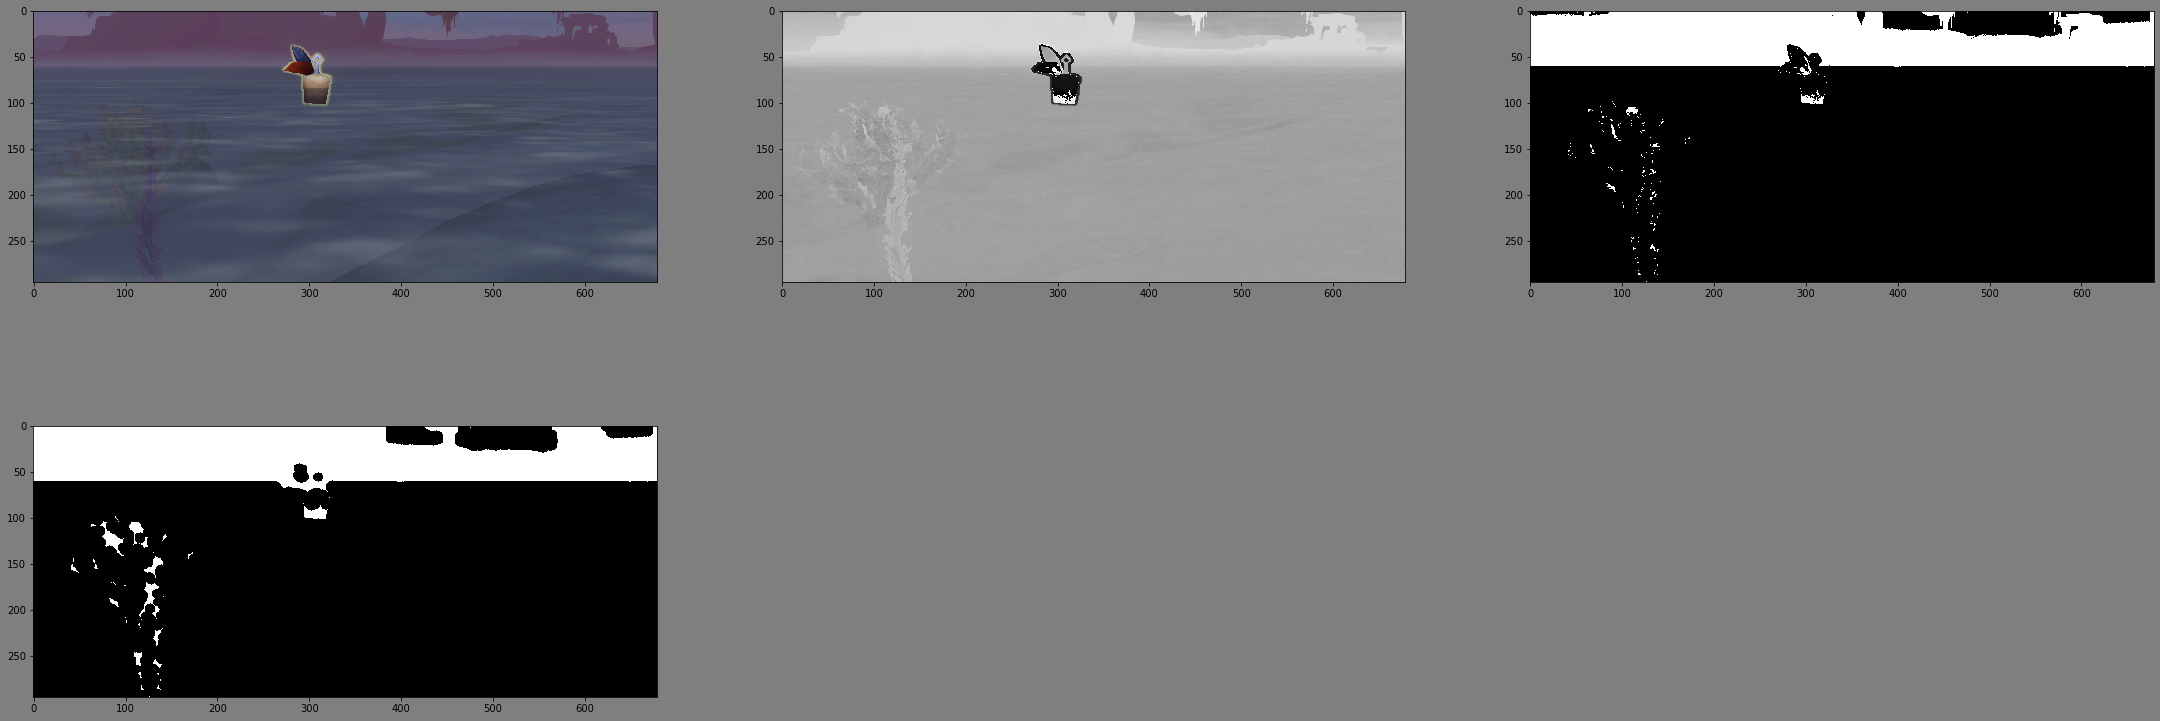

In [165]:
import cv2 as cv
import numpy as np
import itertools

def partial_solution(hls, chan=0, th_mode=cv.THRESH_BINARY):
    imgs = []
    hue = hls[:,:, chan]
    r, mask = cv.threshold(hue, 0, 128, cv.THRESH_OTSU + th_mode)
    im = dilate_erode(mask)
    nb_components, output, stats, centroids = cv.connectedComponentsWithStats(im, connectivity=8)
    ccs = []
    for i in range(1, nb_components):
        if stats[i][cv.CC_STAT_AREA] > 400 and stats[i][cv.CC_STAT_AREA] < 1500:
            q = ((output==i).astype(np.uint8))
            ccs.append((i, q))

    imgs += [img, hue, mask, im] + list(map(lambda x: x[1], ccs))

    blue1 = (100, 0, 0)
    blue2 = (137, 255, 255)
    red1 = (1, 0, 0)
    red2 = (10, 255, 255)
    # yellow1 = (25-12, 0, 0)
    # yellow2 = (25+12, 255, 255)

    # yellow1 = (160, 0, 200)
    # yellow2 = (180, 20, 255)

    red_range = (20, 400)
    blue_range = (20, 400)


    sol = []
    ss = []
    for i, m in ccs:
        m1 = cv.bitwise_and(img, img, mask=m)
        hsv = cv.cvtColor(m1, cv.COLOR_RGB2HSV)
        m_blue = cv.inRange(hsv, blue1, blue2)
        m_red = cv.inRange(hsv, red1, red2)
        #m_yellow = cv.inRange(hsv, yellow1, yellow2)
        # m_blue = dilate_erode(m_blue, 3)
        # m_red = dilate_erode(m_red, 3)
        blue_cnt = np.count_nonzero(m_blue == 255)
        red_cnt = np.count_nonzero(m_red == 255)
        print(blue_cnt, red_cnt, stats[i][cv.CC_STAT_AREA])
        imgs += [m1, m_blue, cv.bitwise_and(m1, m1, mask=m_blue), m_red, cv.bitwise_and(m1, m1, mask=m_red)]
        if blue_cnt > blue_range[0] and blue_cnt < blue_range[1] and \
            red_cnt > red_range[0] and red_cnt < red_range[1]:
            sol.append(sol)
            ss.append(centroids[i])
    return ss, sol, imgs

img = cv.cvtColor(cv.imread('after.png'), cv.COLOR_RGB2BGR)
hls = cv.cvtColor(img, cv.COLOR_RGB2HSV)

#for th, ch in itertools.product([cv.THRESH_BINARY, cv.THRESH_BINARY_INV], [0, 1, 2]):

ch = 0
th = cv.THRESH_BINARY
ss, sol, imgs = partial_solution(hls, chan=ch, th_mode=th)
plot_images(imgs)
    # if len(ss) > 0:
    #     print(len(sol))
    #     print(ss)
    #     break


4
2 241 41 191
3 253 63 162
2


<Figure size 432x288 with 0 Axes>

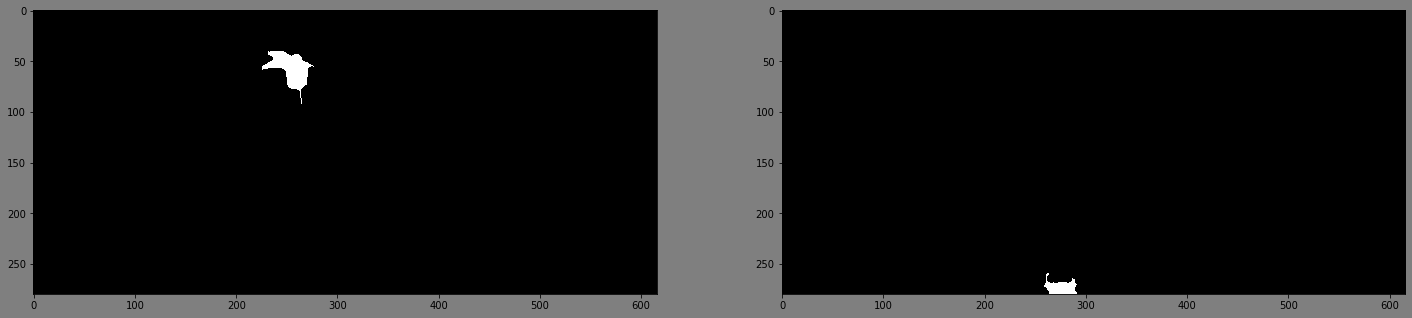

In [94]:
import cv2 as cv
import numpy as np
import itertools

img = cv.cvtColor(cv.imread('after1.png'), cv.COLOR_RGB2BGR)
hls = cv.cvtColor(img, cv.COLOR_RGB2LUV)
ch0 = hls[:, :, 0]
ch1 = hls[:, :, 1]
ch2 = hls[:, :, 2]

quality = False
x = 64
amount = 1.0
w, h = ch0.shape
while amount > 0.01:
    mask = (ch0 > x).astype(np.uint8)
    mask = dilate_erode(mask, 3)
    cnt = np.count_nonzero(mask > 0)
    amount = cnt / (w*h)
    x = x + 5

cc = []
nb_components, output, stats, centroids = cv.connectedComponentsWithStats(mask, connectivity=8)
imgs = []
for i, (x, y, w, h, a) in enumerate(stats):
    if i == 0:
        continue
    if a > 200:
        q = (output==i).astype(np.uint8)
        #q = dilate_erode(q)
        #imgs.append(q)
        inv = np.invert(q)
        inv = (inv == 255).astype(np.uint8)
        n, o, s, c = cv.connectedComponentsWithStats(inv, connectivity=8)
        print(n)
        for j, (x_, y_, w_, h_, a_) in enumerate(s):
            if j == 0 or a_ > 5000:
                continue
            p = (o==j).astype(np.uint8)
            print(j, x_, y_, a_)
            #imgs.append(p)
            q = cv.bitwise_or(q, p)
        #imgs.append(inv)
        #imgs.append(p)
        cc.append([i, q])
        #print(i, x, y, a)

#imgs += [img, ch0, ch1, ch2]
#imgs += [mask]
imgs.extend(map(lambda x: x[1], cc))
plot_images(imgs)

(18, 30)


<Figure size 432x288 with 0 Axes>

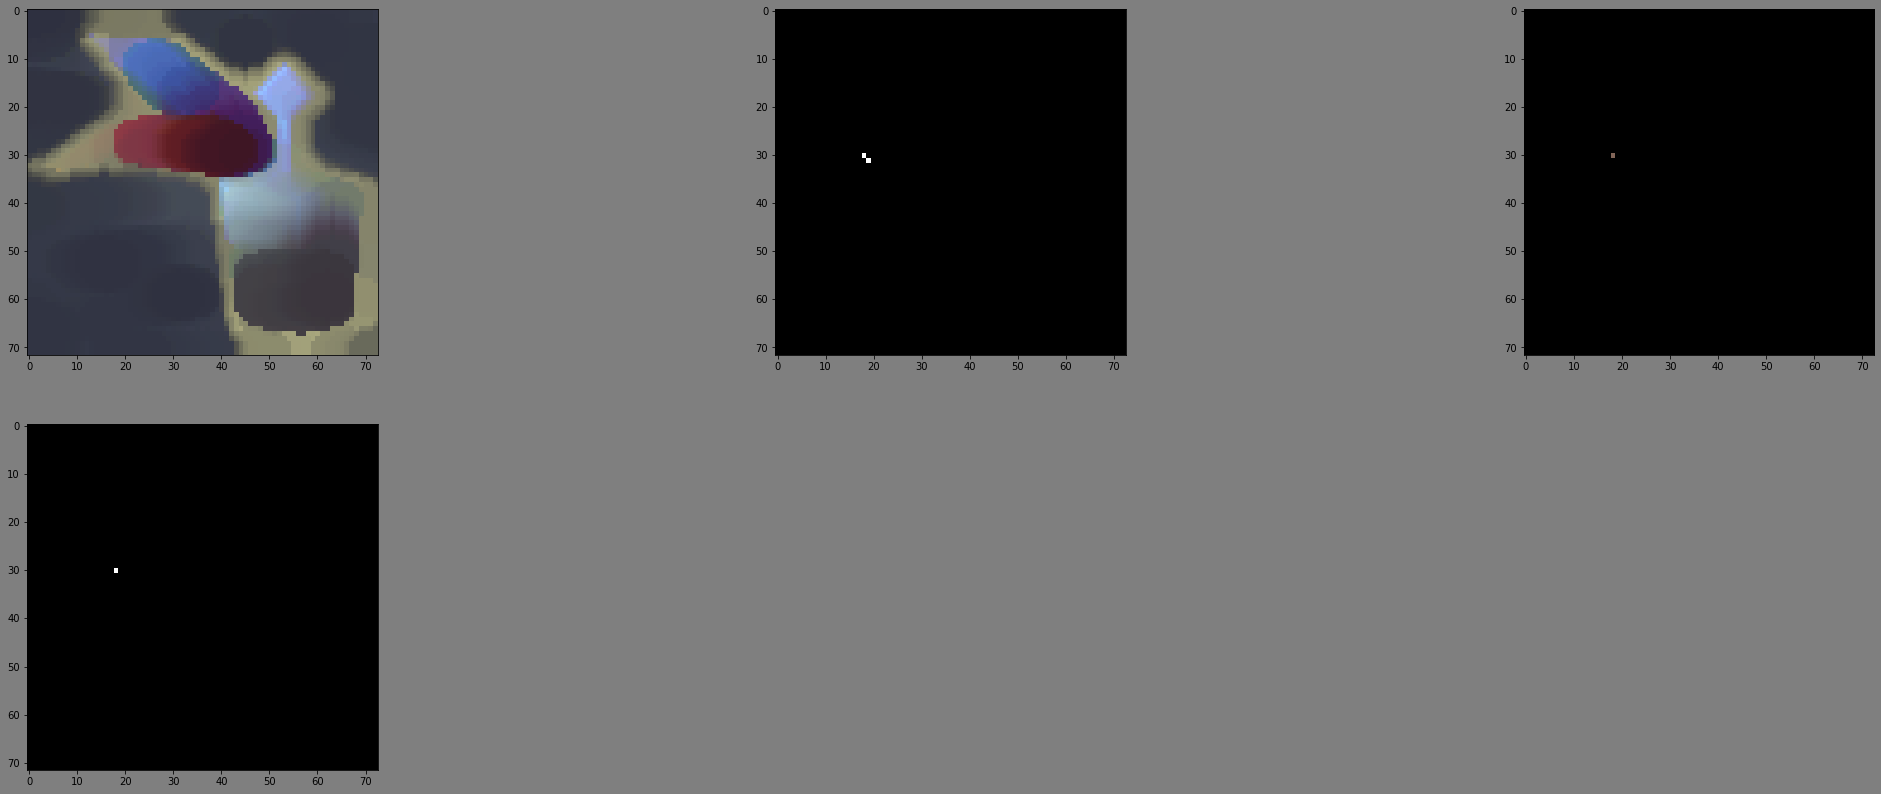

In [106]:
import cv2 as cv
import numpy as np
from main import *


from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt

imgs = []



def sol(img):
    #img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    img = dilate_erode(img, 5)
    red1 = (1, 0, 0)
    red2 = (14, 255, 255)
    imgs = []
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    m_red = cv.inRange(hsv, red1, red2)
    nb_components, output, stats, centroids = cv.connectedComponentsWithStats(m_red, connectivity=4)
    m = max(zip(stats[1:], range(1,nb_components)), key=lambda x: x[0][cv.CC_STAT_AREA])
    max_lab = (output == m[1]).astype(np.uint8)
    max_lab *= 255
    imgs += [img, m_red, cv.bitwise_and(img, img, mask=max_lab)]
    imgs.append(max_lab)
    return max_lab, tuple(map(int, centroids[m[1]])), m[0][cv.CC_STAT_AREA], imgs

from glob import glob


# def on_move(event):
#     # get the x and y pixel coords
#     x, y = event.x, event.y
#     print('data coords %f %f' % (event.xdata, event.ydata))


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('f{event.x},{event.y}')
        # plt.disconnect(binding_id)


# binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

for fn in glob('bobber121.png'):
    img = cv.cvtColor(cv.imread(fn), cv.COLOR_RGB2BGR)
    l, c, a, imgs = sol(img)
    print(c)
    plot_images(imgs)
    # r = solution(img, None, False)
    # if r:
    #     t, x, y, w, h, a = r
    #     print(r)
    #     r = solution(img, t, False)
    #     print(r)
    #     if r:
    #         t0, x0, y0, w0, h0, a0 = r



<Figure size 432x288 with 0 Axes>

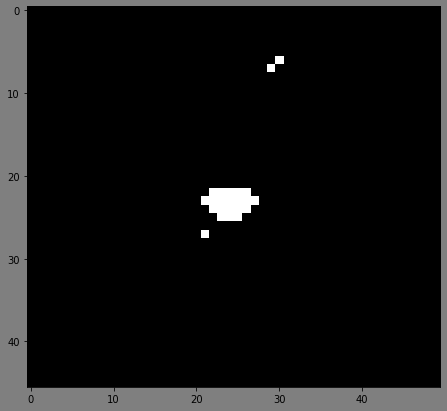

In [79]:
import enum
import cv2 as cv
import numpy as np
import itertools
import matplotlib.pyplot as plt
import math
import cv2 as cv
from main import *

imgs = []
img = cv.cvtColor(cv.imread('bobber416.png'), cv.COLOR_RGB2BGR)
luv = cv.cvtColor(img, cv.COLOR_RGB2LUV)

mask = find_threshold(luv[:, :, 0])

imgs.append(mask)
cc, labels, centroids = filter_connected_components(mask, \
    lambda i, st, l, c: st[cv.CC_STAT_AREA] > 400)
for i in cc:
    label = (labels == i).astype(np.uint8)
    label *= 255
    label, im = fill_gaps(label)
    imgs.append(label)

plot_images(imgs)

[3, 4, 6, 7]


<Figure size 432x288 with 0 Axes>

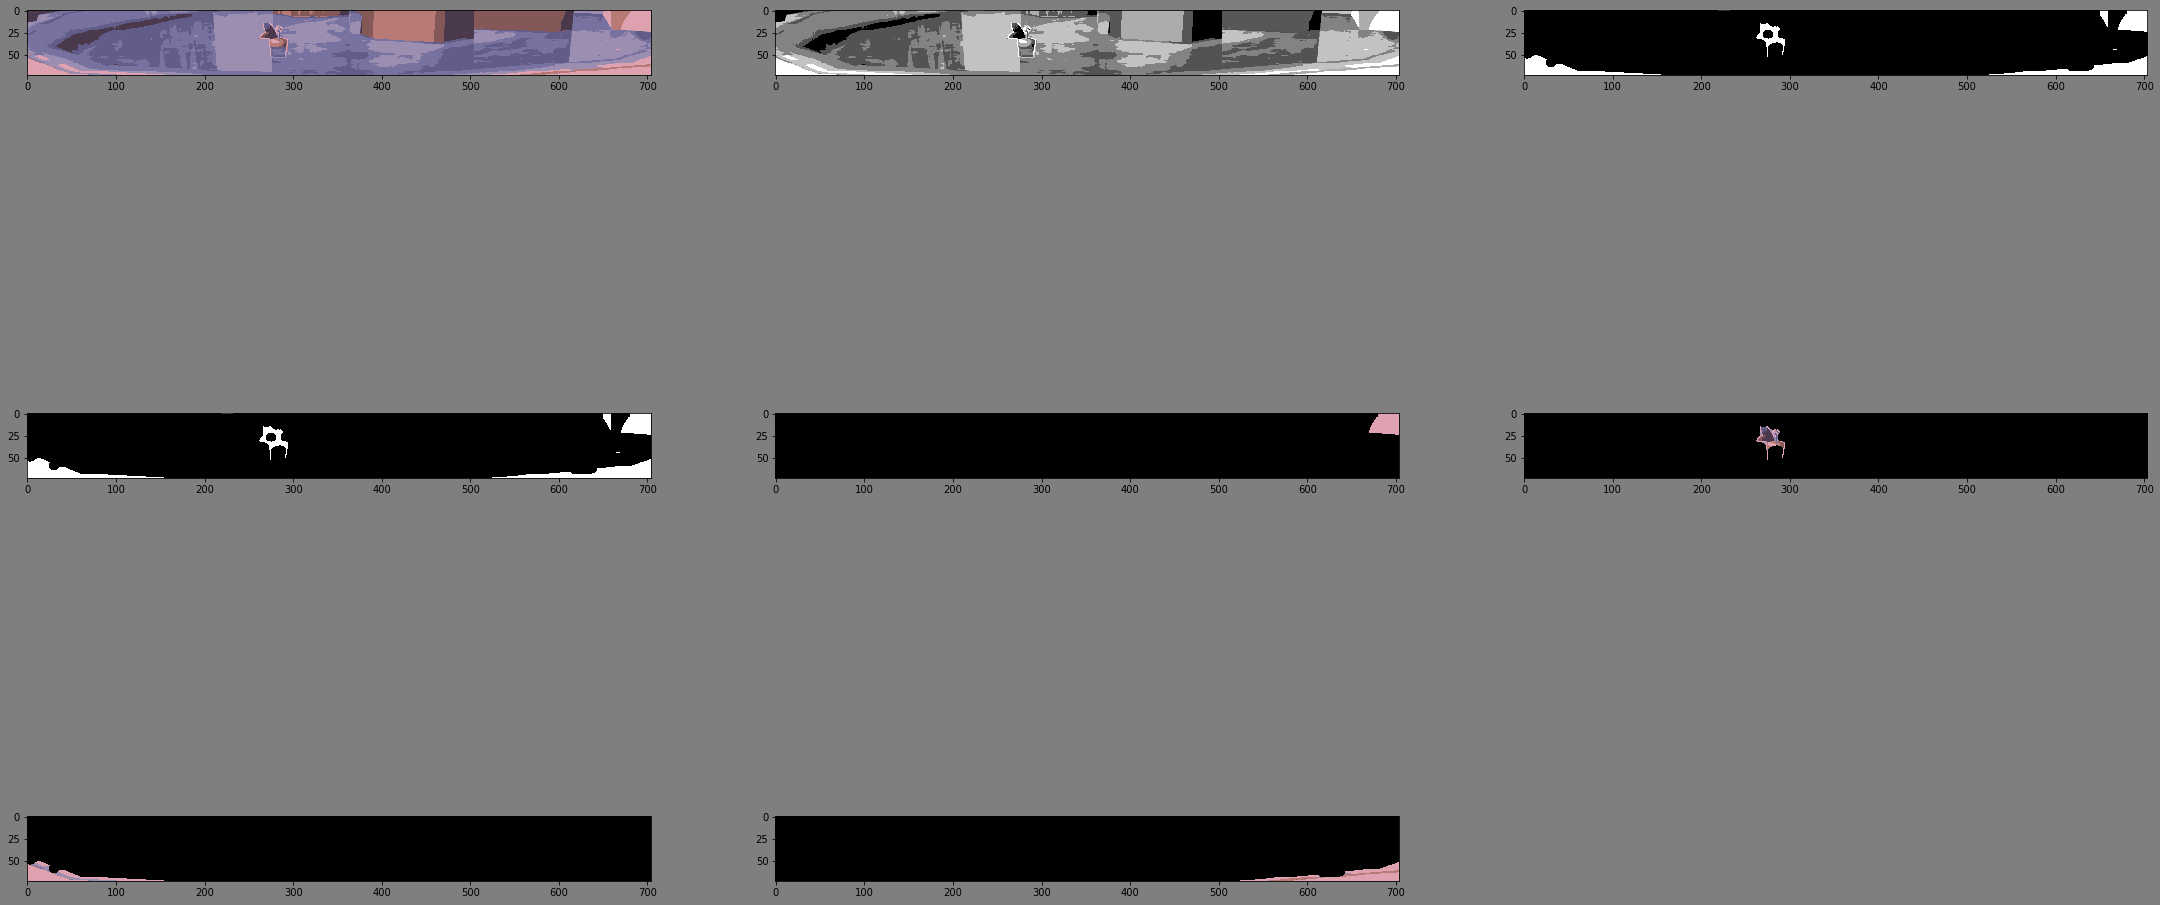

In [102]:
import enum
import cv2 as cv
import numpy as np
import itertools
import matplotlib.pyplot as plt
import math
import cv2 as cv
import main as main
from importlib import reload

def partial_solution(hls, chan=0, th_mode=cv.THRESH_BINARY):

    blue1 = (100, 0, 0)
    blue2 = (137, 255, 255)
    red1 = (1, 0, 0)
    red2 = (10, 255, 255)
    red_range = (20, 500)
    blue_range = (20, 500)


    sol = []
    ss = []
    for i, m in ccs:
        m1 = cv.bitwise_and(img, img, mask=m)
        hsv = cv.cvtColor(m1, cv.COLOR_RGB2HSV)
        m_blue = cv.inRange(hsv, blue1, blue2)
        m_red = cv.inRange(hsv, red1, red2)
        #m_yellow = cv.inRange(hsv, yellow1, yellow2)
        # m_blue = dilate_erode(m_blue, 3)
        # m_red = dilate_erode(m_red, 3)
        blue_cnt = np.count_nonzero(m_blue == 255)
        red_cnt = np.count_nonzero(m_red == 255)
        print(blue_cnt, red_cnt, stats[i][cv.CC_STAT_AREA])
        imgs += [m1, m_blue, cv.bitwise_and(m1, m1, mask=m_blue), m_red, cv.bitwise_and(m1, m1, mask=m_red)]
        if blue_cnt > blue_range[0] and blue_cnt < blue_range[1] and \
            red_cnt > red_range[0] and red_cnt < red_range[1]:
            sol.append(sol)
            ss.append(centroids[i])
    return ss, sol, imgs

main = reload(main)

imgs = []
img = cv.cvtColor(cv.imread('after_.png'), cv.COLOR_RGB2BGR)
#luv = cv.cvtColor(img, cv.COLOR_RGB2LUV)
luv = cv.cvtColor(img, cv.COLOR_RGB2LUV)
ch0 = luv[:, :, 0]

mask = main.find_threshold(ch0, 0.1)
mask = dilate_erode(mask)

imgs += [img, ch0, mask, dilate_erode(mask)]
cc, labels, centroids = main.filter_connected_components(mask, \
    lambda i, st, l, c: st[cv.CC_STAT_AREA] > 400)

print(cc)
for i in cc:
    label = (labels == i).astype(np.uint8)
    label *= 255
    label, im = main.fill_gaps(label)
    candidate = cv.bitwise_and(img, img, mask=label)
    imgs.append(candidate)

main.plot_images(imgs)

0 255
2686 26 27


<Figure size 432x288 with 0 Axes>

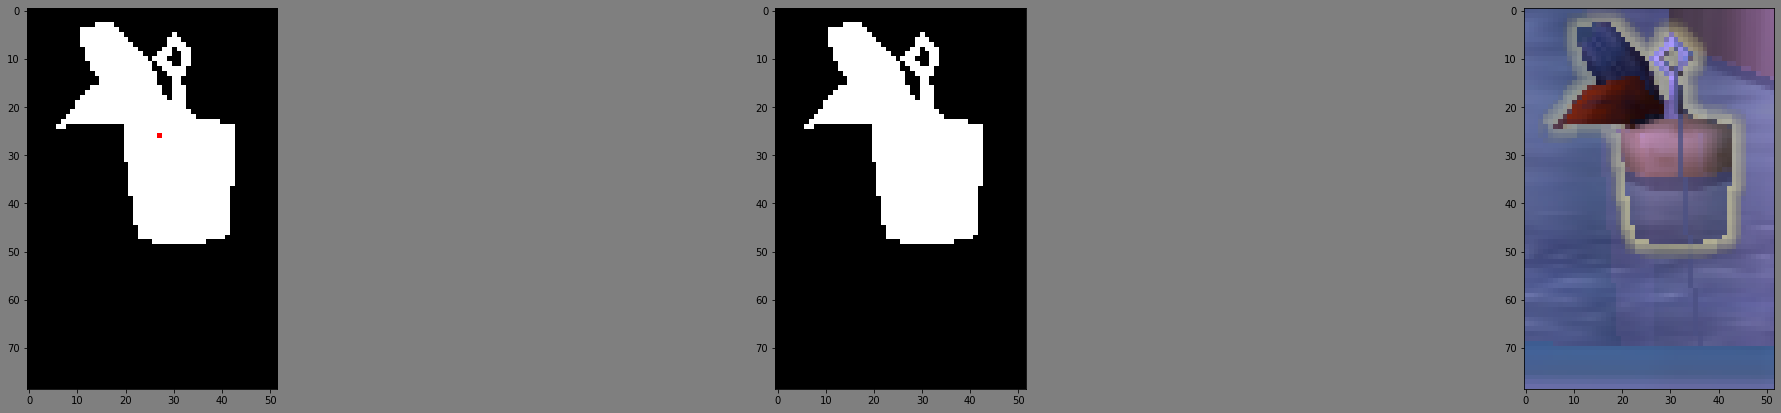

0 255
1099 16 22


<Figure size 432x288 with 0 Axes>

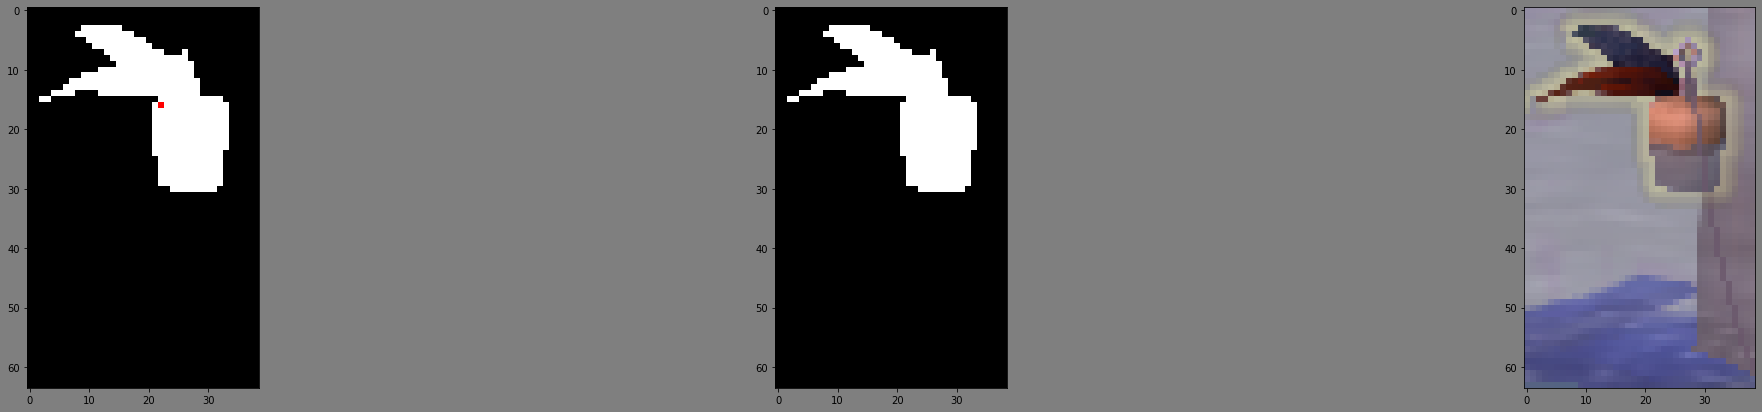

0 255
1087 16 22


<Figure size 432x288 with 0 Axes>

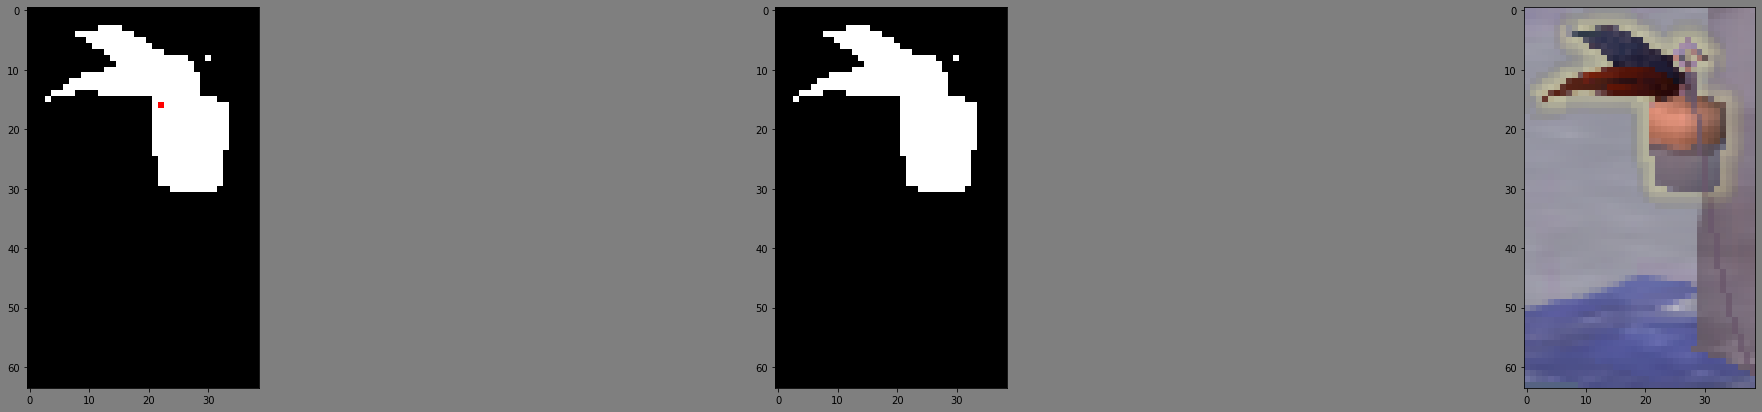

0 255
1072 16 22


<Figure size 432x288 with 0 Axes>

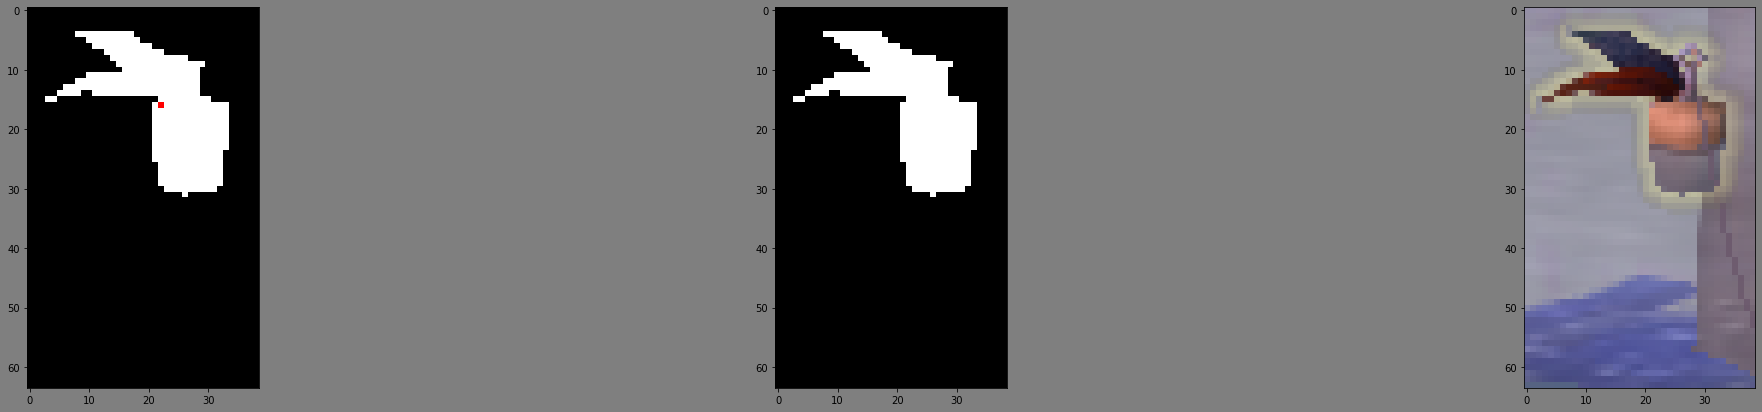

0 255
1084 16 22


<Figure size 432x288 with 0 Axes>

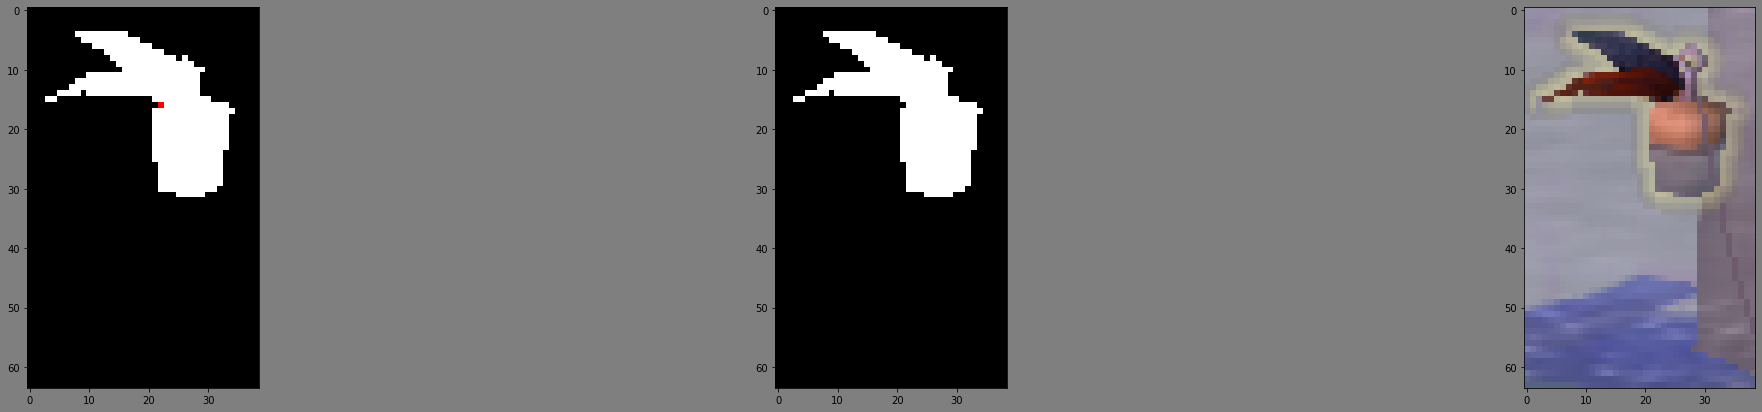

0 255
1069 16 22


<Figure size 432x288 with 0 Axes>

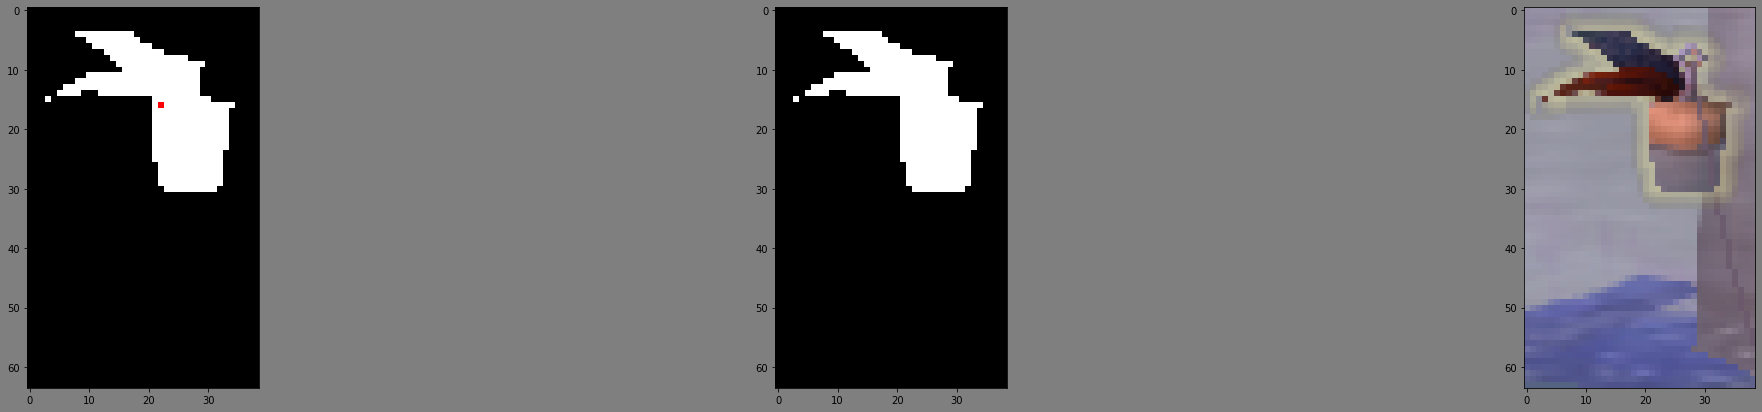

0 255
1102 16 22


<Figure size 432x288 with 0 Axes>

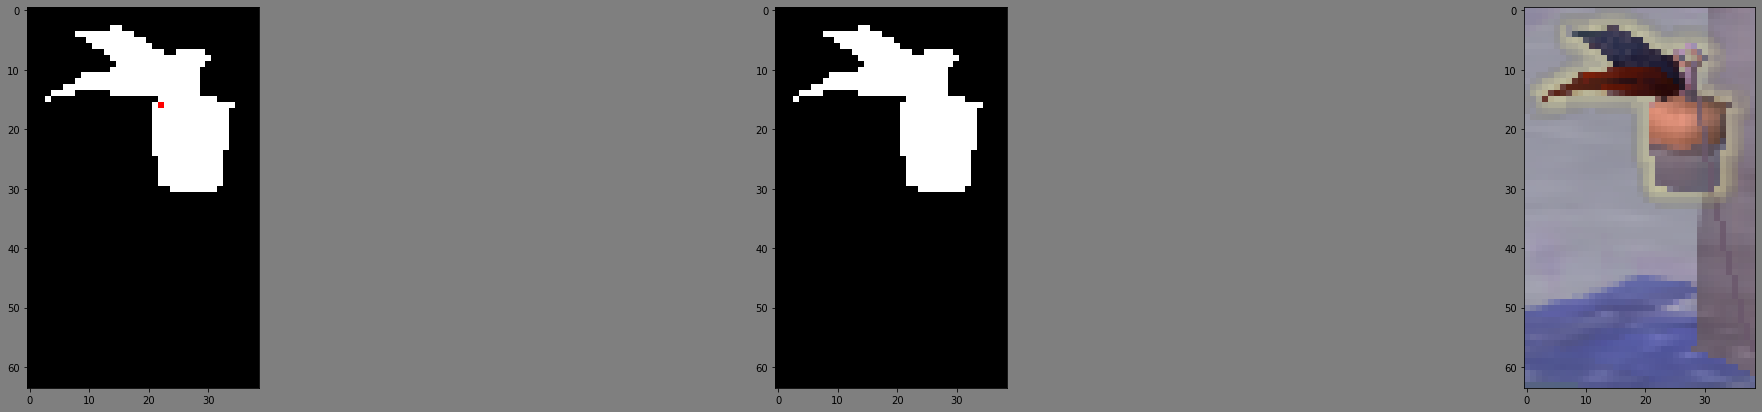

In [194]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from main import *

import glob

def sol(img):
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    h,w,_ = img.shape
    rect = (2,2, w-4, h-4)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    #img = img*mask2[:,:,np.newaxis]
    # img = dilate_erode(img, 3)
    # img = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    # img = img[:,:,0]
    # img = (img > 96).astype(np.uint8)
    # img *= 255

    img = np.ones(img.shape[:2], np.uint8)*mask2[:,:]
    img *= 255
    # img_ = img.copy()
    # img = dilate_erode(img, 5)
    # print(img.shape)

    # nb_components, output, stats, centroids = cv.connectedComponentsWithStats(img, connectivity=4)
    # if nb_components > 1:
    #     m = max(zip(stats[1:], range(1,nb_components)), key=lambda x: x[0][cv.CC_STAT_AREA])
    #     x, y = tuple(map(int, centroids[m[1]]))
    #     max_lab = (output == m[1]).astype(np.uint8)
    #     max_lab *= 255
    
    center = [ np.average(indices) for indices in np.where(img >= 255) ]
    x, y = map(int, center)

    #img[x][y] = 0
    print(img.min(), img.max())

    img1 = np.zeros((*img.shape[:2], 3), dtype=np.uint8)
    img1[:,:,0] = img[:,:]
    img1[:,:,1] = img[:,:]
    img1[:,:,2] = img[:,:]
    img1[x][y] = (255,0,0)
    # img[x][y] = 0
    return x, y, img, img1

for fn in glob.glob('fail*.png'):
    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    *cent, mask, img1 = sol(img)
    x, y = cent
    a = np.count_nonzero(img1)
    print(a, x, y)
    plot_images([img1, mask, img])

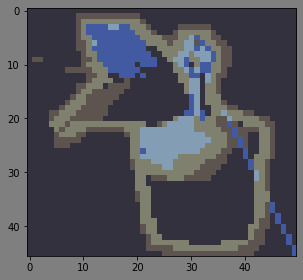

In [76]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans

original = io.imread('bobber416.png')
n_colors = 5

arr = original.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
less_colors = centers[labels].reshape(original.shape).astype('uint8')

io.imsave('after_.png', less_colors)
io.imshow(less_colors)